<a href="https://colab.research.google.com/github/Hyunseo-BA/BigData_Lab/blob/master/dnn_boston_regression_easy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 데이터 불러오기

In [1]:
from tensorflow.keras.datasets import boston_housing

In [2]:
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
print('train data shape:', train_data.shape)
print('test data shape:', test_data.shape)

train data shape: (404, 13)
test data shape: (102, 13)


In [ ]:
# 집 값이 타겟변수(연속형 숫자)
train_targets.shape

(404,)

#### 회귀 예측 모델링

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(13,))) # 입력 변수가 13개 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='mse', # 회귀 시 손실함수 Mean Squared Error
              metrics=['mae']) # Mean Absolute Error

In [ ]:
history = model.fit(train_data, train_targets,
                    epochs=100,
                    batch_size=1)

Epoch 1/100
404/404 [==============================] - 0s 1ms/step - loss: 165.5997 - mae: 9.7467
Epoch 2/100
404/404 [==============================] - 0s 1ms/step - loss: 114.0297 - mae: 7.6272
Epoch 3/100
404/404 [==============================] - 0s 1ms/step - loss: 102.2102 - mae: 7.3814
Epoch 4/100
404/404 [==============================] - 0s 1ms/step - loss: 84.1105 - mae: 6.7186
Epoch 5/100
404/404 [==============================] - 0s 1ms/step - loss: 72.0997 - mae: 6.2920
Epoch 6/100
404/404 [==============================] - 0s 1ms/step - loss: 65.5198 - mae: 5.8727
Epoch 7/100
404/404 [==============================] - 0s 1ms/step - loss: 59.6268 - mae: 5.6971
Epoch 8/100
404/404 [==============================] - 0s 1ms/step - loss: 55.0641 - mae: 5.5113
Epoch 9/100
404/404 [==============================] - 0s 1ms/step - loss: 54.2543 - mae: 5.3410
Epoch 10/100
404/404 [==============================] - 0s 1ms/step - loss: 48.6528 - mae: 5.2599
Epoch 11/100
404/404 [====

#### 모델 성능 평가

In [ ]:
mae = history.history['mae']
loss = history.history['loss']

epochs = range(len(mae))

In [ ]:
import matplotlib.pyplot as plt

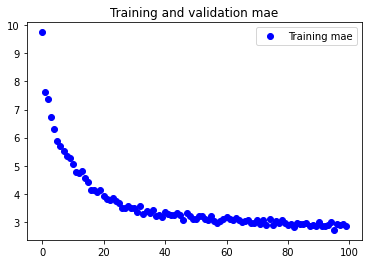

In [ ]:
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.title('Training and validation mae')
plt.legend()

plt.show()

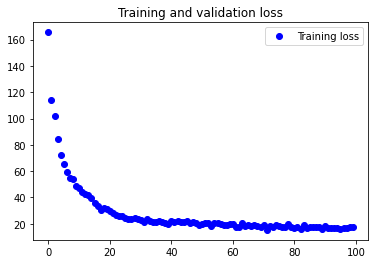

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 24.9146 - mae: 3.5839
